# BBH Disk Meshes

In [5]:
using GLMakie
using GeometryBasics
using SplitApplyCombine

In [6]:
function get_rectangles(pos, rads)
    recs = Vector{Rect3}()
    for rad in rads
        org = pos .- rad
        push!(recs, Rect3(Point3f(org), Vec3f(rad * 2)))
    end
    return recs
end

get_rectangles (generic function with 1 method)

## Discussion

* Level 1 to 9: $256^3$
* Level 10: $320^3$
* Level 11 to 12: $96^3 \times 2$

In [7]:
(256/16*20), (256/8*3)

(320.0, 96.0)

### Best max_grid_sizes (Gtheory)

In [8]:
[[cbrt((256^3)/n), cbrt((320^3)/n), cbrt((96^3)/(n/2))] for n in [4, 8, 16, 32, 64]]

5-element Vector{Vector{Float64}}:
 [161.26989438654377, 201.58736798317972, 76.19525049447357]
 [128.0, 160.0, 60.47621039495391]
 [101.59366732596477, 126.99208415745596, 48.0]
 [80.63494719327188, 100.79368399158986, 38.097625247236785]
 [64.0, 80.0, 30.238105197476955]

### Grid size difference

In [9]:
320^3/256^3

1.953125

In [10]:
(96^3*2)/ 256^3

0.10546875

In [11]:
(256^3/2)^(1/3)

203.18733465192946

In [12]:
(320^3/2)^(1/3)

253.98416831491184

## Paramters

In [13]:
# Set rectangles
pos_1 = [-6.508727e+00, -7.591869e+00, 0.0]
pos_2 = [ 6.508727e+00,  7.591869e+00, 0.0]
pos_3 = [0.0, 0.0, 0.0]

rads_1 = [
    [-1., 6., 6., 6., 6., 6., 6., 6., 6., 6., 3., 1.5],
    [-1., 6., 6., 6., 6., 6., 6., 6., 6., 6., 3., 1.5],
    [-1., 6., 6., 6., 6., 6., 6., 6., 6., 6., 3., 1.5],
]
rads_2 = [
    [-1., 6., 6., 6., 6., 6., 6., 6., 6., 6., 3., 1.5],
    [-1., 6., 6., 6., 6., 6., 6., 6., 6., 6., 3., 1.5],
    [-1., 6., 6., 6., 6., 6., 6., 6., 6., 6., 3., 1.5],
]
rads_3 = [
    [-1., 4096., 2048., 1024., 512., 256., 128., 64., 32., 20.],
    [-1., 4096., 2048., 1024., 512., 256., 128., 64., 32., 20.],
    [-1., 4096., 2048., 1024., 512., 256., 128., 64., 32., 20.],
]

# Rectangles
recs_1 = get_rectangles(pos_1, invert(rads_1))
recs_2 = get_rectangles(pos_2, invert(rads_2))
recs_3 = get_rectangles(pos_3, invert(rads_3))

println(length(recs_1), ", ", length(recs_2), ", ", length(recs_3))

12, 12, 10


## Plots

### Down to Level 9

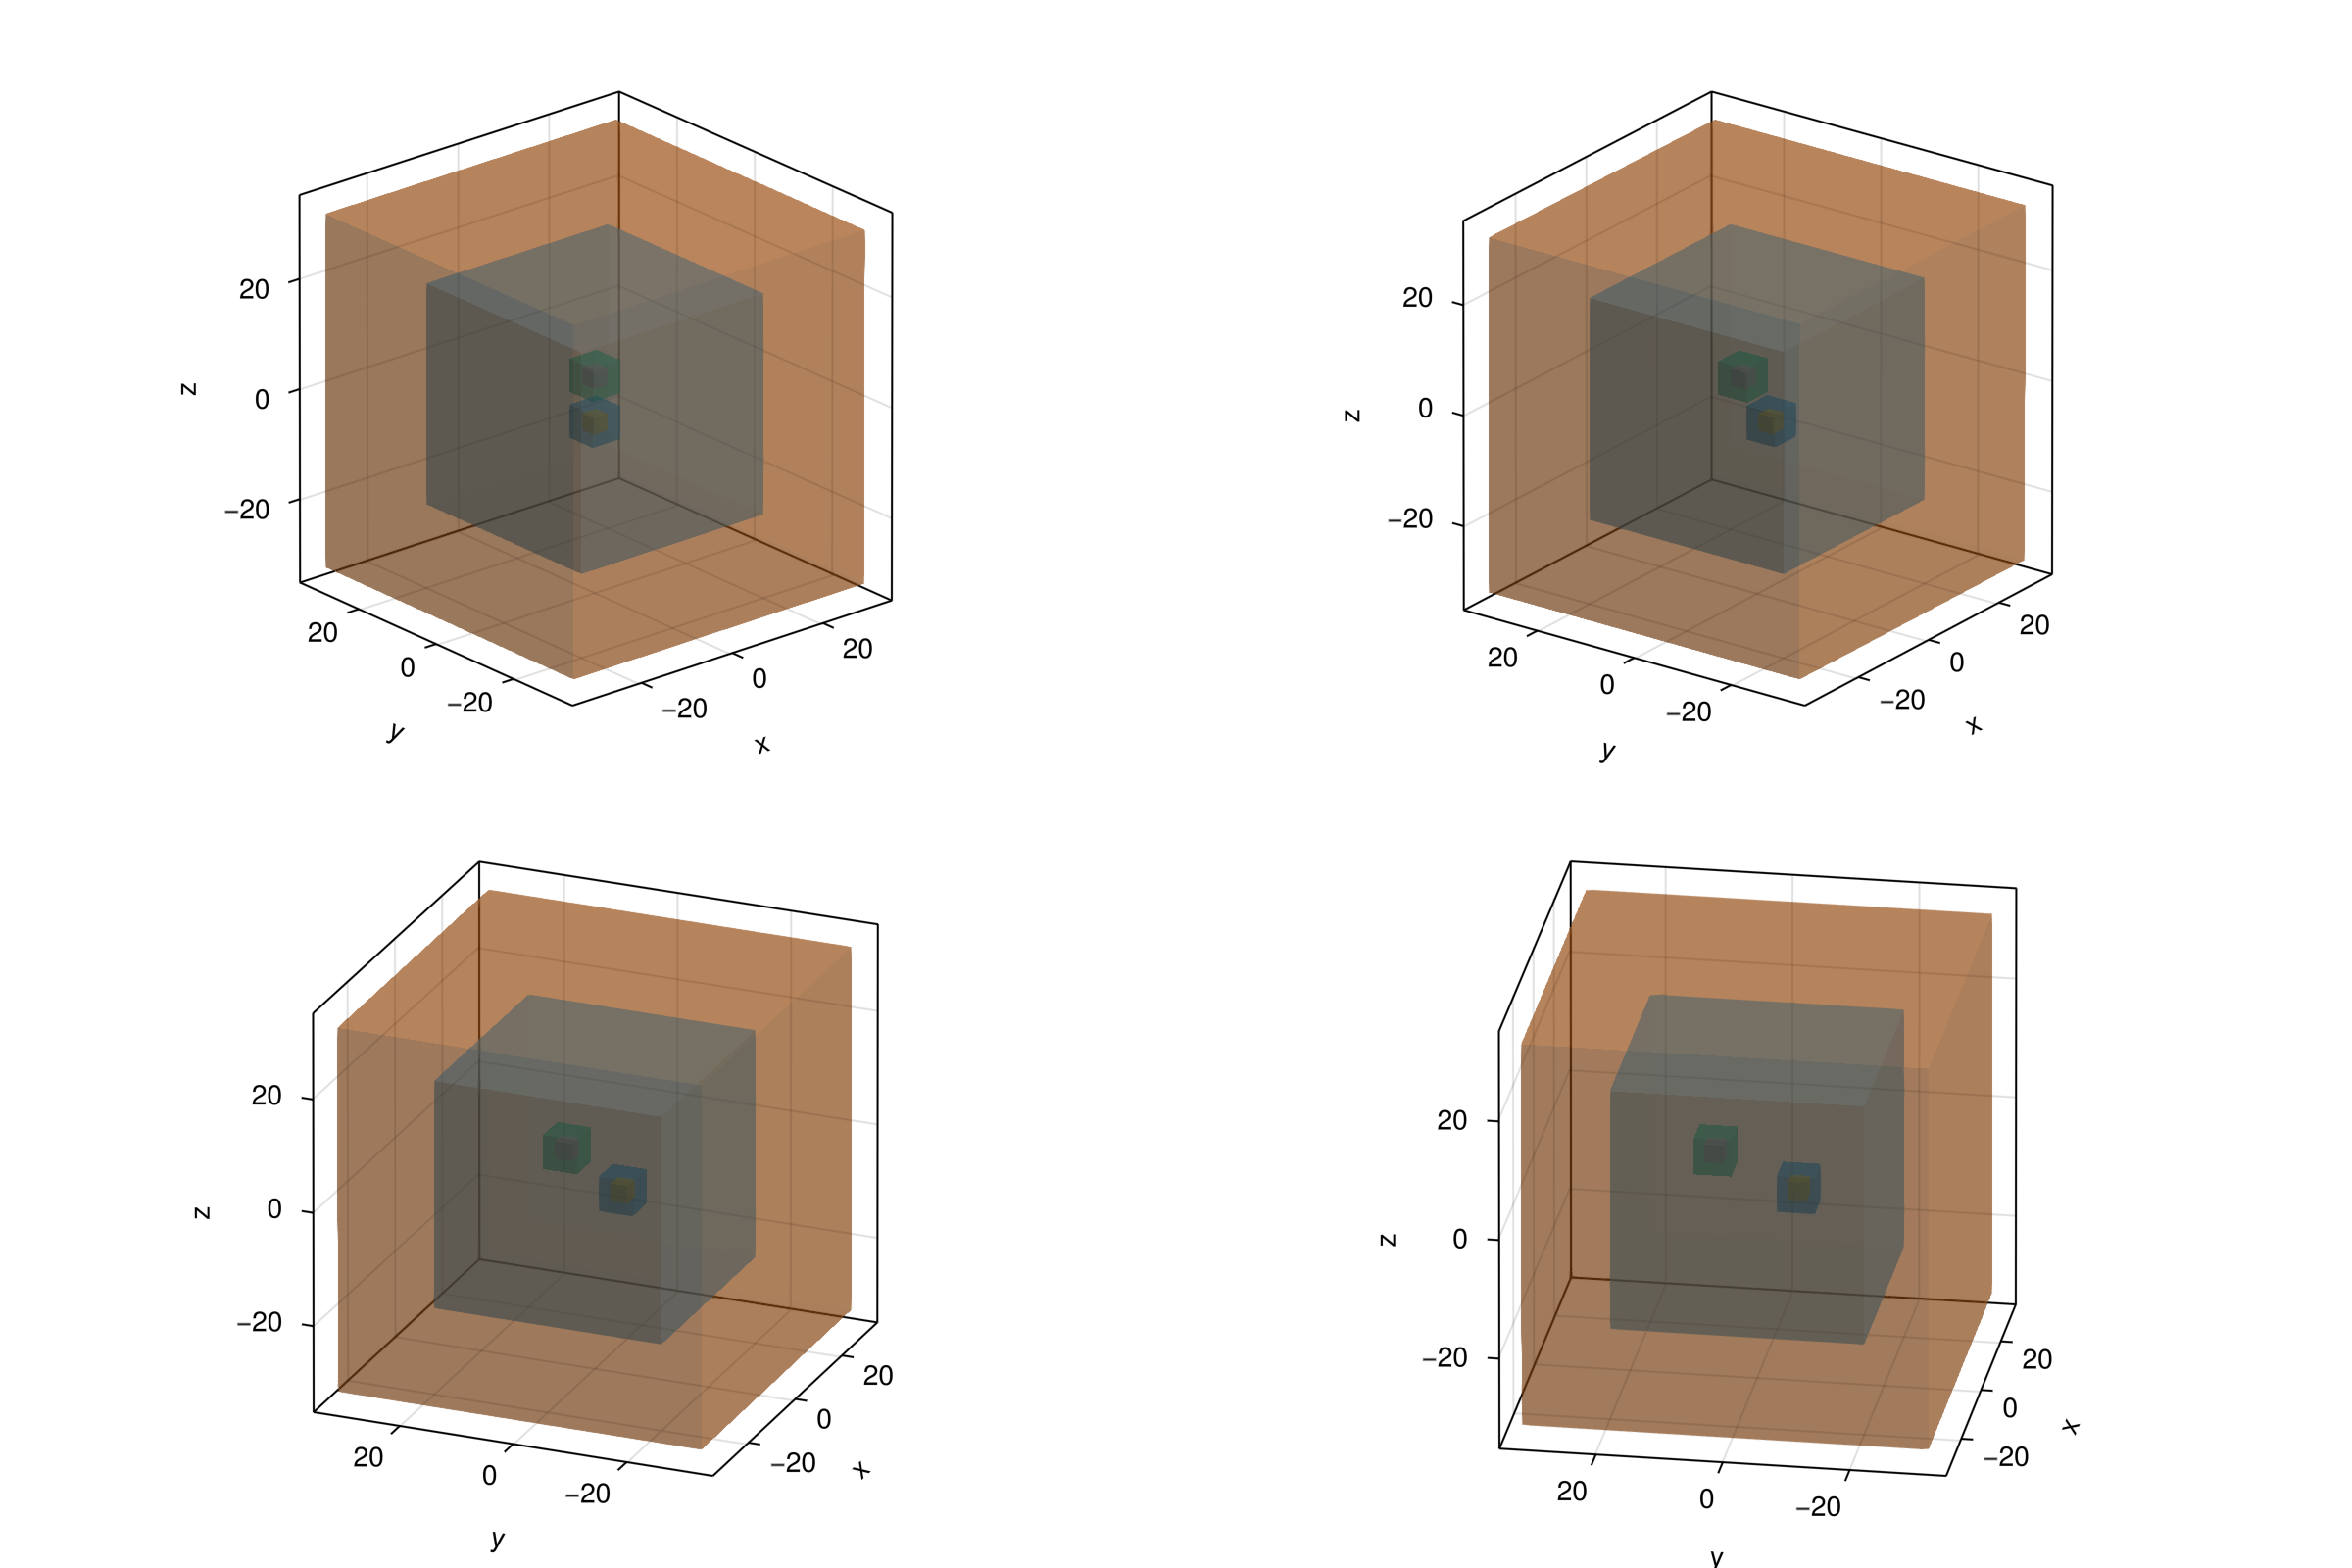

In [14]:
let recs = [
        recs_1[11], recs_1[12],
        recs_2[11], recs_2[12],
        recs_3[10], recs_3[9],
    ]
    # Plot
    #with_theme(theme_dark()) do
    fig = Figure(size = (1200,800))
    axs = [
        Axis3(fig[1, 1]; aspect = :data, azimuth=1.275pi, elevation=pi/8),
        Axis3(fig[1, 2]; aspect = :data, azimuth=1.2pi, elevation=pi/8),
        Axis3(fig[2, 1]; aspect = :data, azimuth=1.125pi, elevation=pi/8),
        Axis3(fig[2, 2]; aspect = :data, azimuth=1.05pi, elevation=pi/8),
    ]
    #meshscatter!(fig[1, 1], r12_1)
    #wireframe!(fig[1, 1], r12_1)
    for ax in axs
        for rec in recs
            mesh!(ax, rec, transparency = true, alpha = 0.5)
        end
    end
    fig
    #end
end

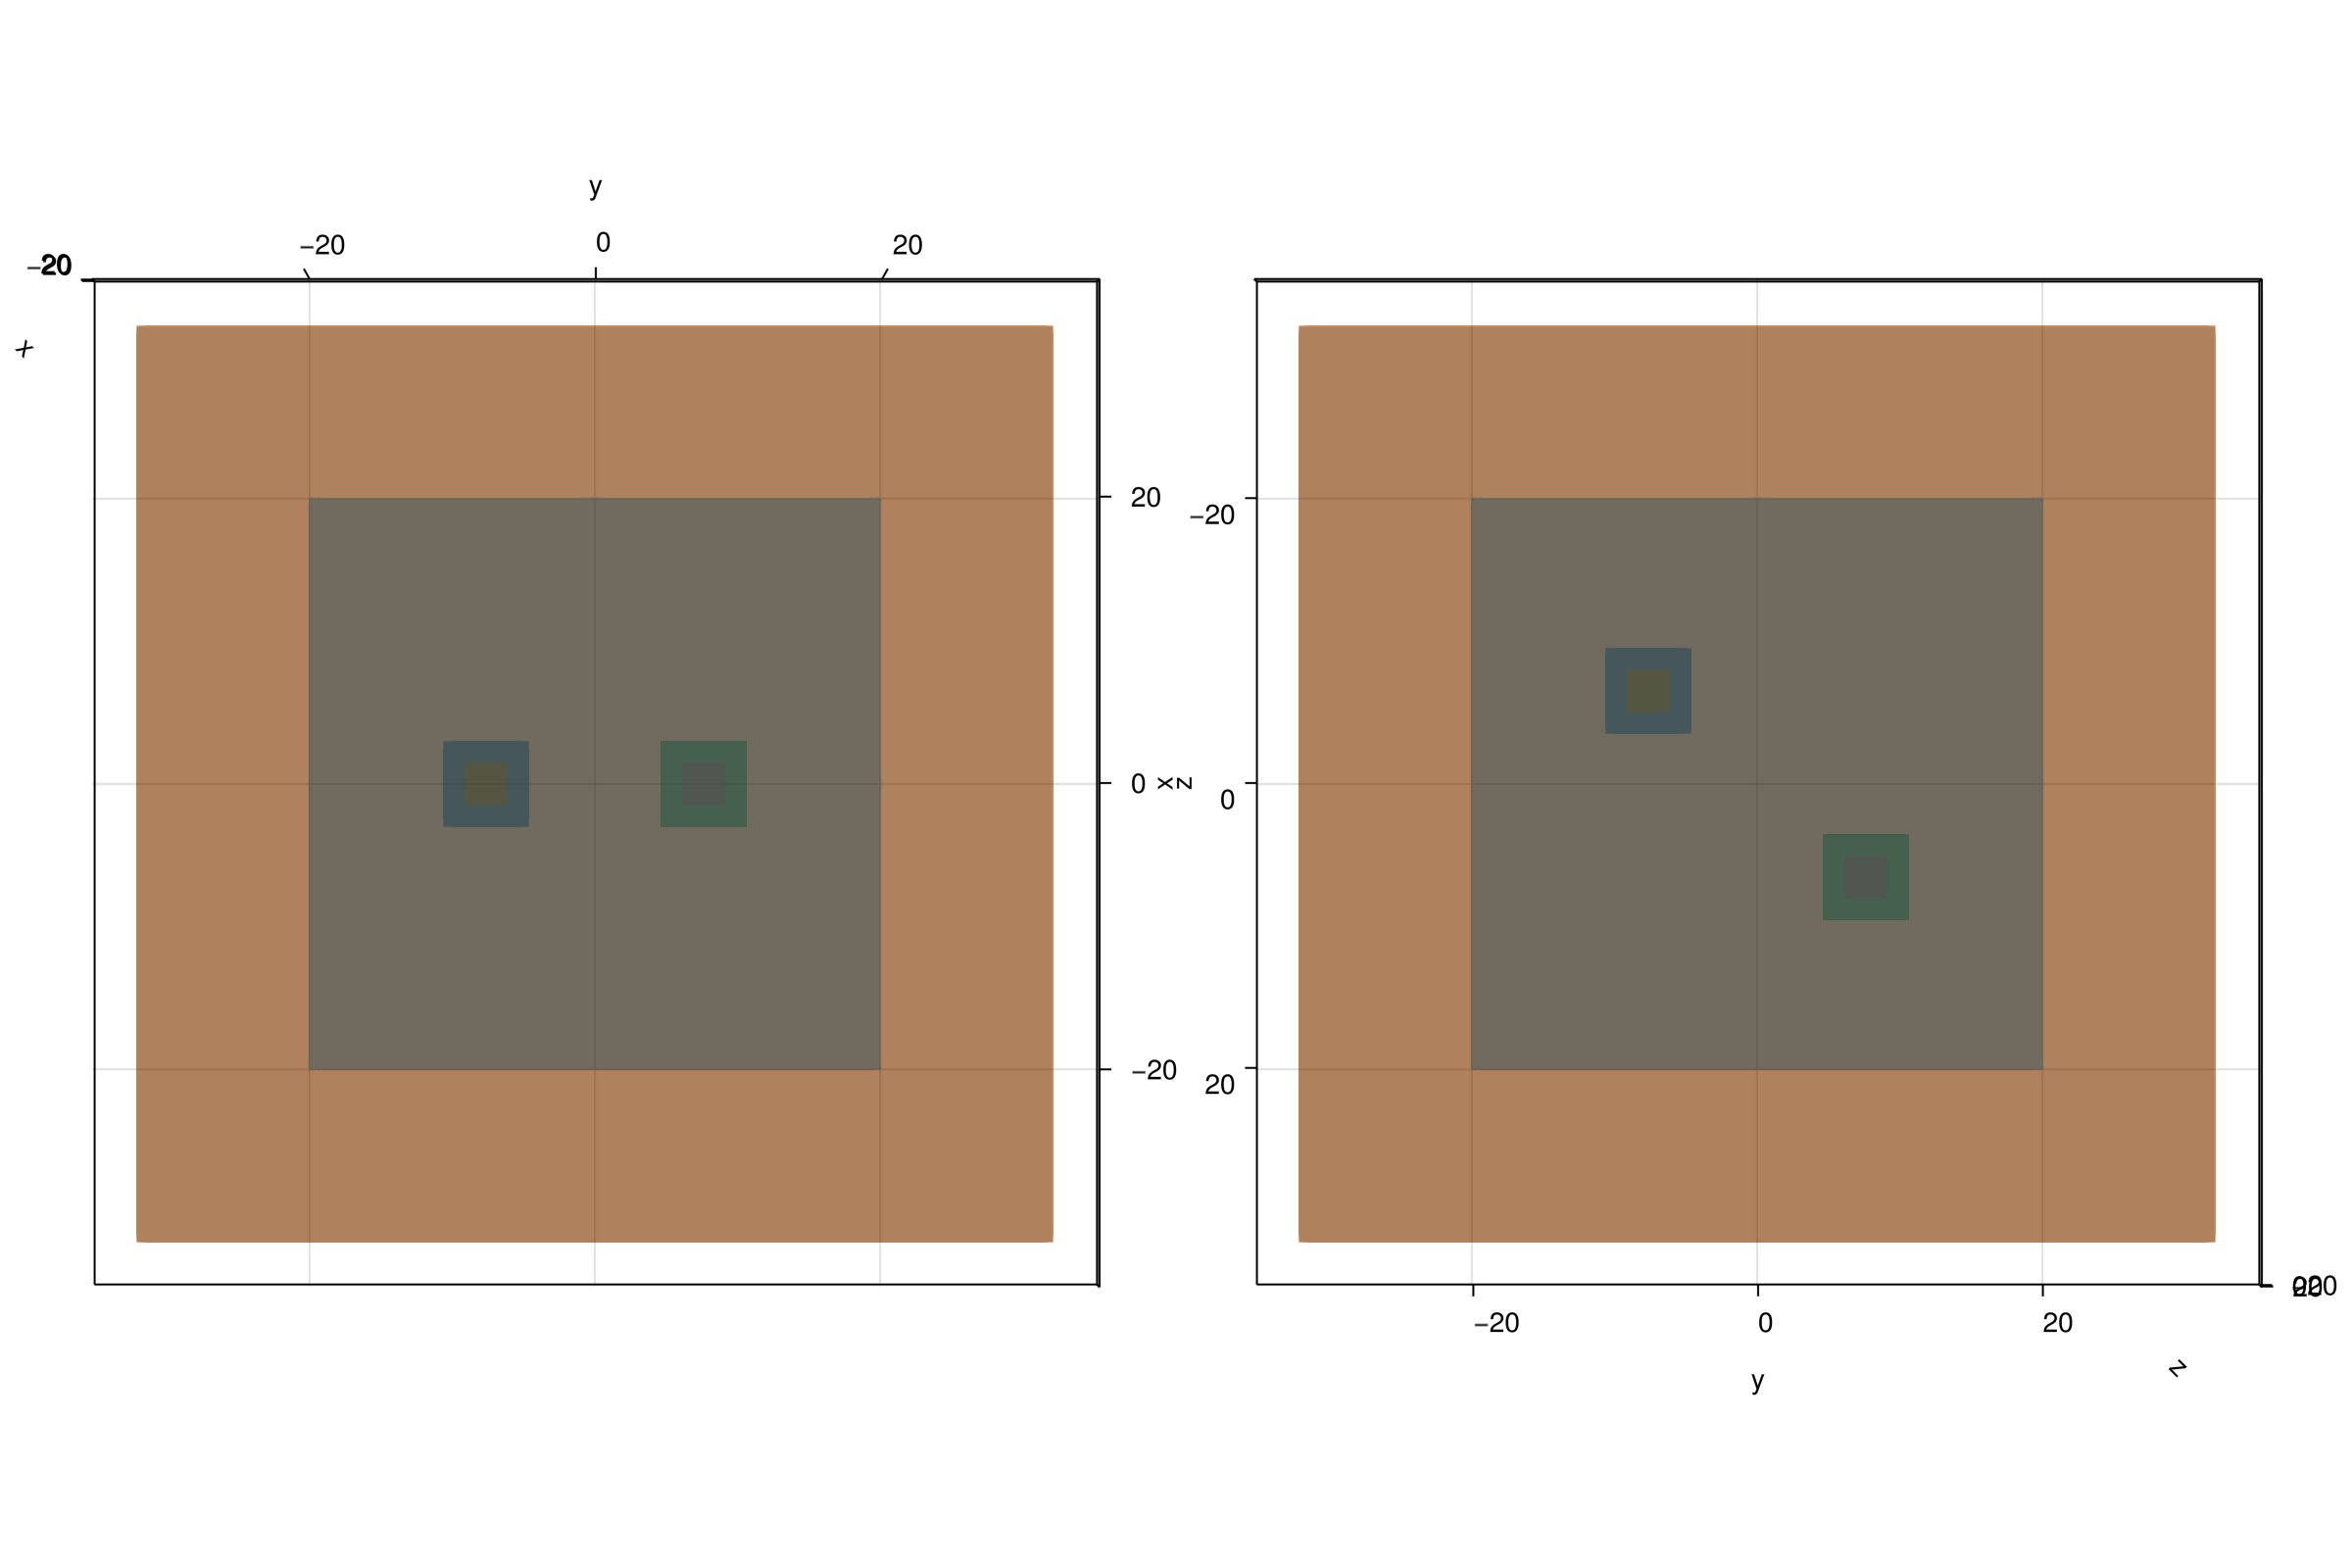

In [15]:
let recs = [
        recs_1[11], recs_1[12],
        recs_2[11], recs_2[12],
        recs_3[10], recs_3[9],
    ]
    # Plot
    #with_theme(theme_dark()) do
    fig = Figure(size = (1200,800))
    axs = [
        Axis3(fig[1, 1]; aspect = :data, azimuth=0pi, elevation=0pi),
        Axis3(fig[1, 2]; aspect = :data, azimuth=0pi, elevation=pi/2),
    ]
    #meshscatter!(fig[1, 1], r12_1)
    #wireframe!(fig[1, 1], r12_1)
    for ax in axs
        for rec in recs
            mesh!(ax, rec, transparency = true, alpha = 0.5)
        end
    end
    fig
    #end
end

### Down to Level 7

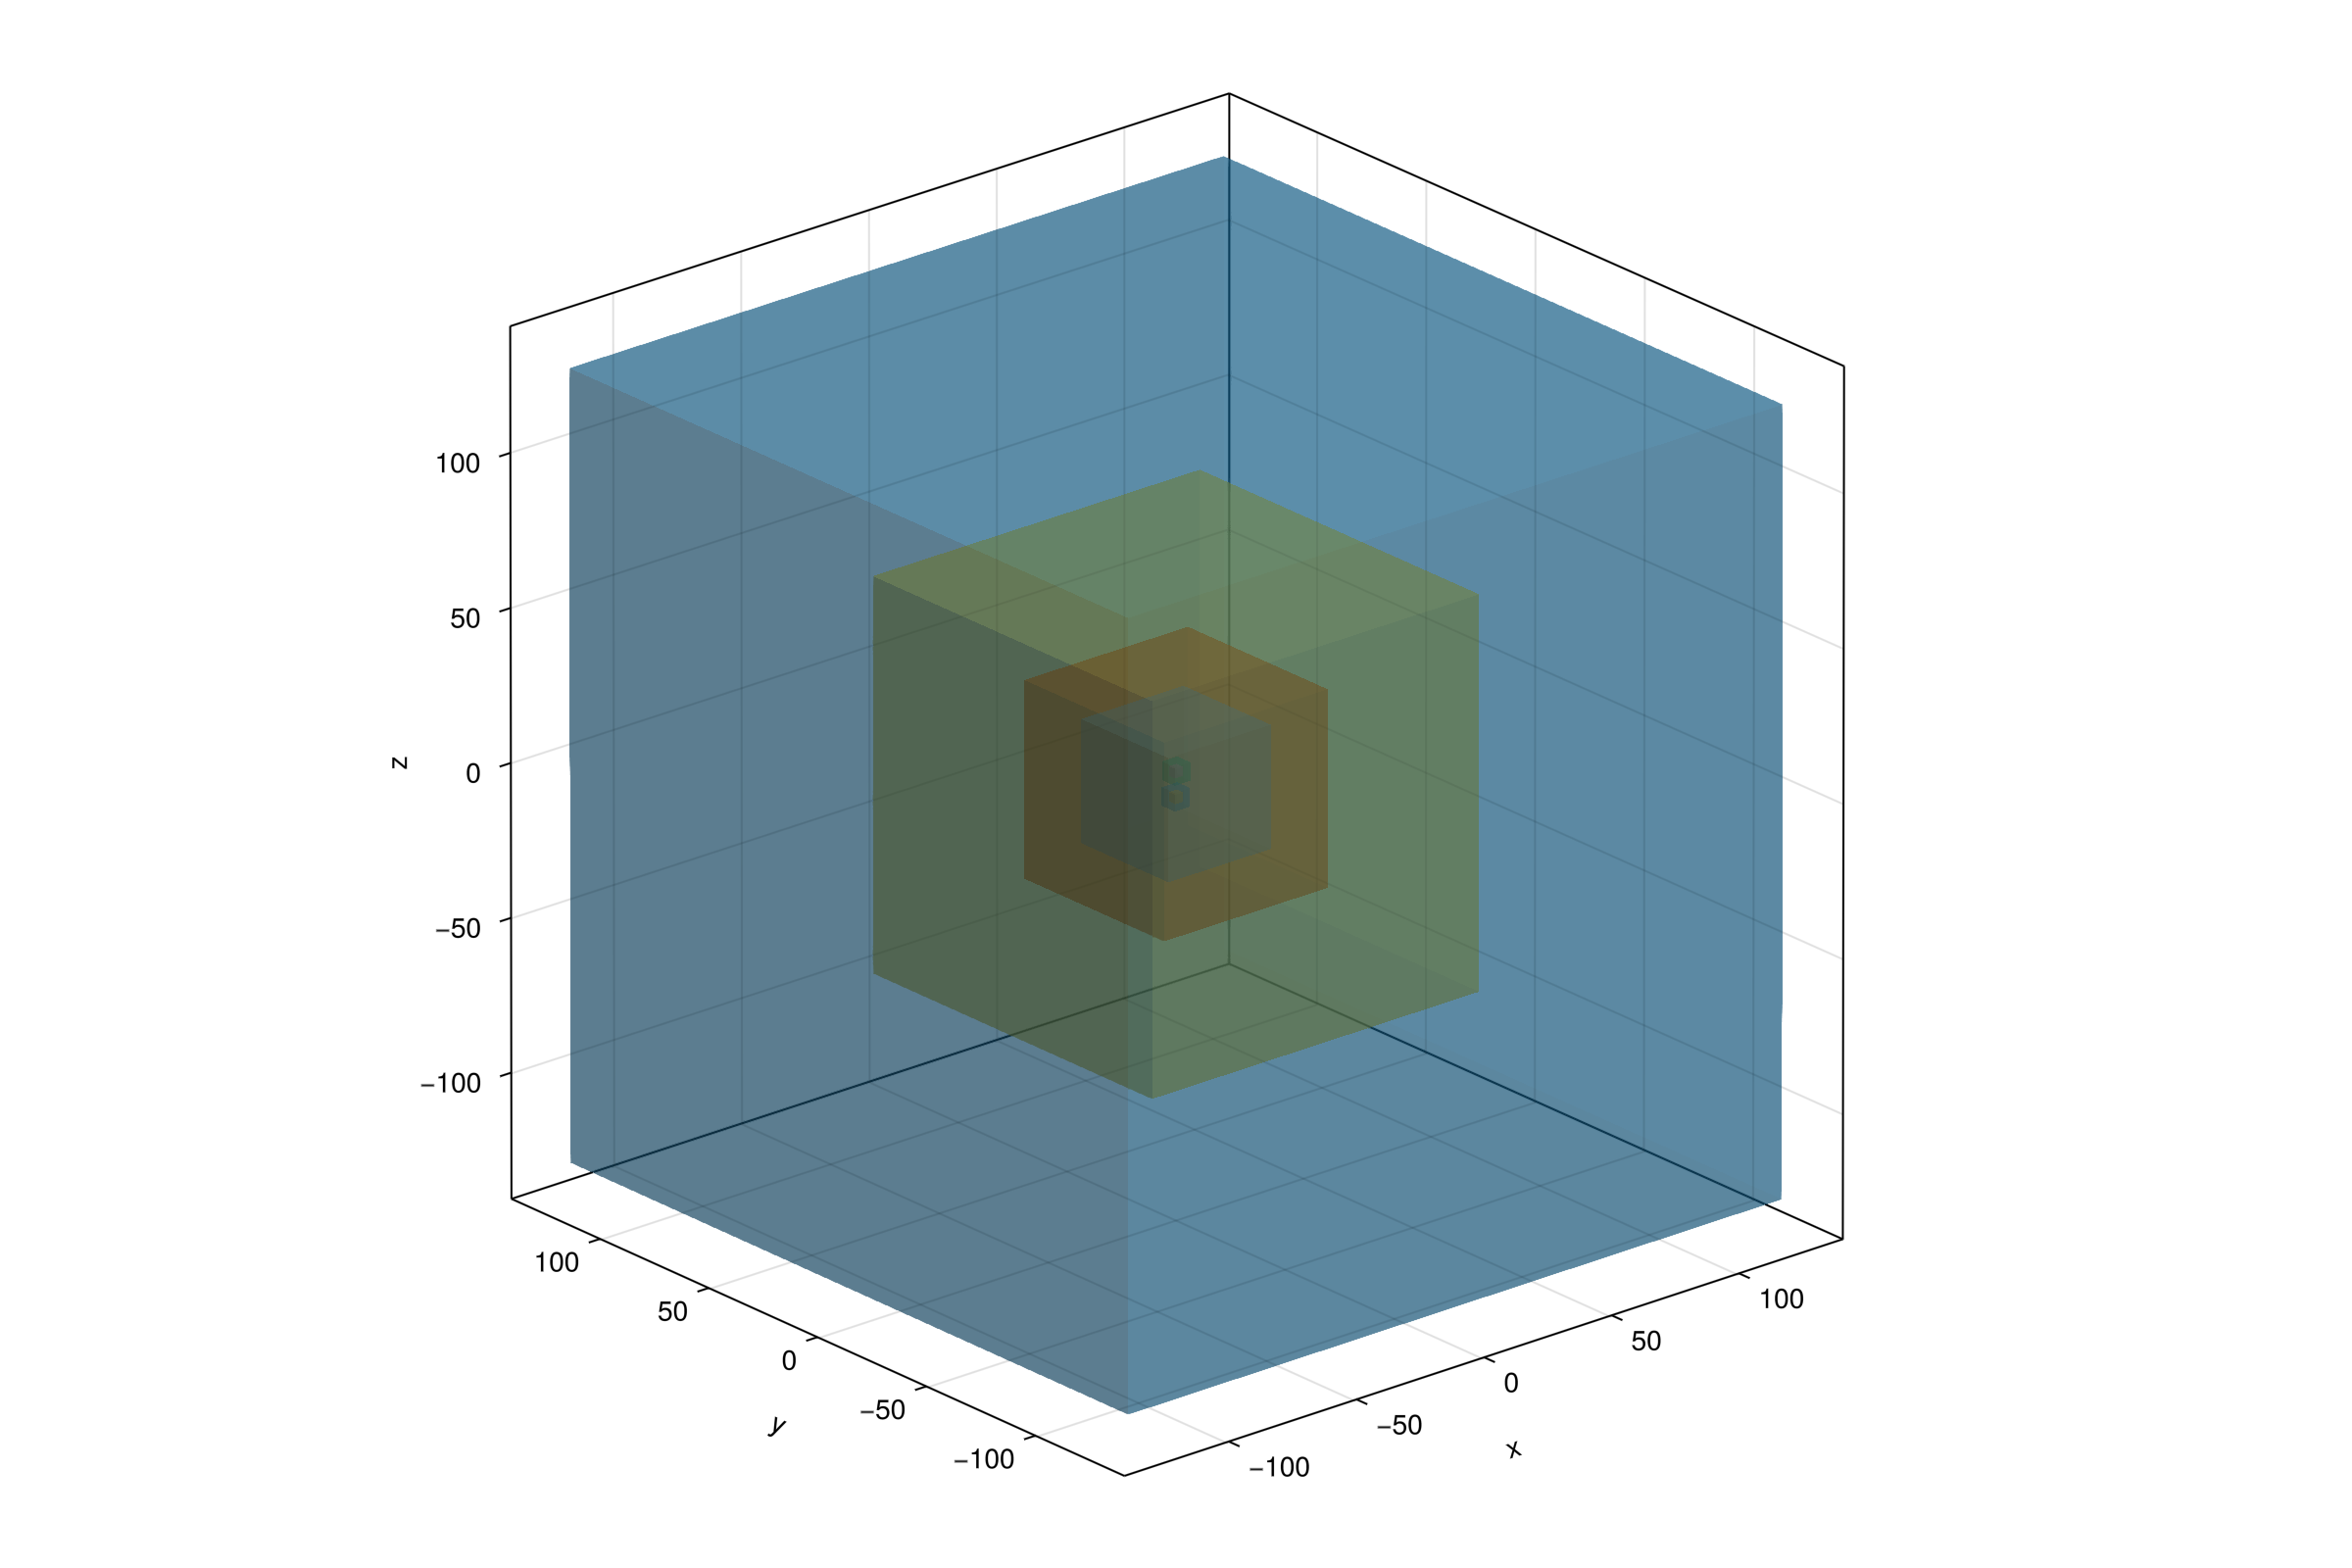

In [16]:
let recs = [
        recs_1[11], recs_1[12],
        recs_2[11], recs_2[12],
        recs_3[10], recs_3[9], recs_3[8], recs_3[7],
    ]
    # Plot
    fig = Figure(size = (1200,800))
    ax = Axis3(fig[1, 1], aspect =:data)
    for rec in recs
        mesh!(fig[1, 1], rec, transparency = true, alpha = 0.5)
    end
    fig
end

### Down to Level 4

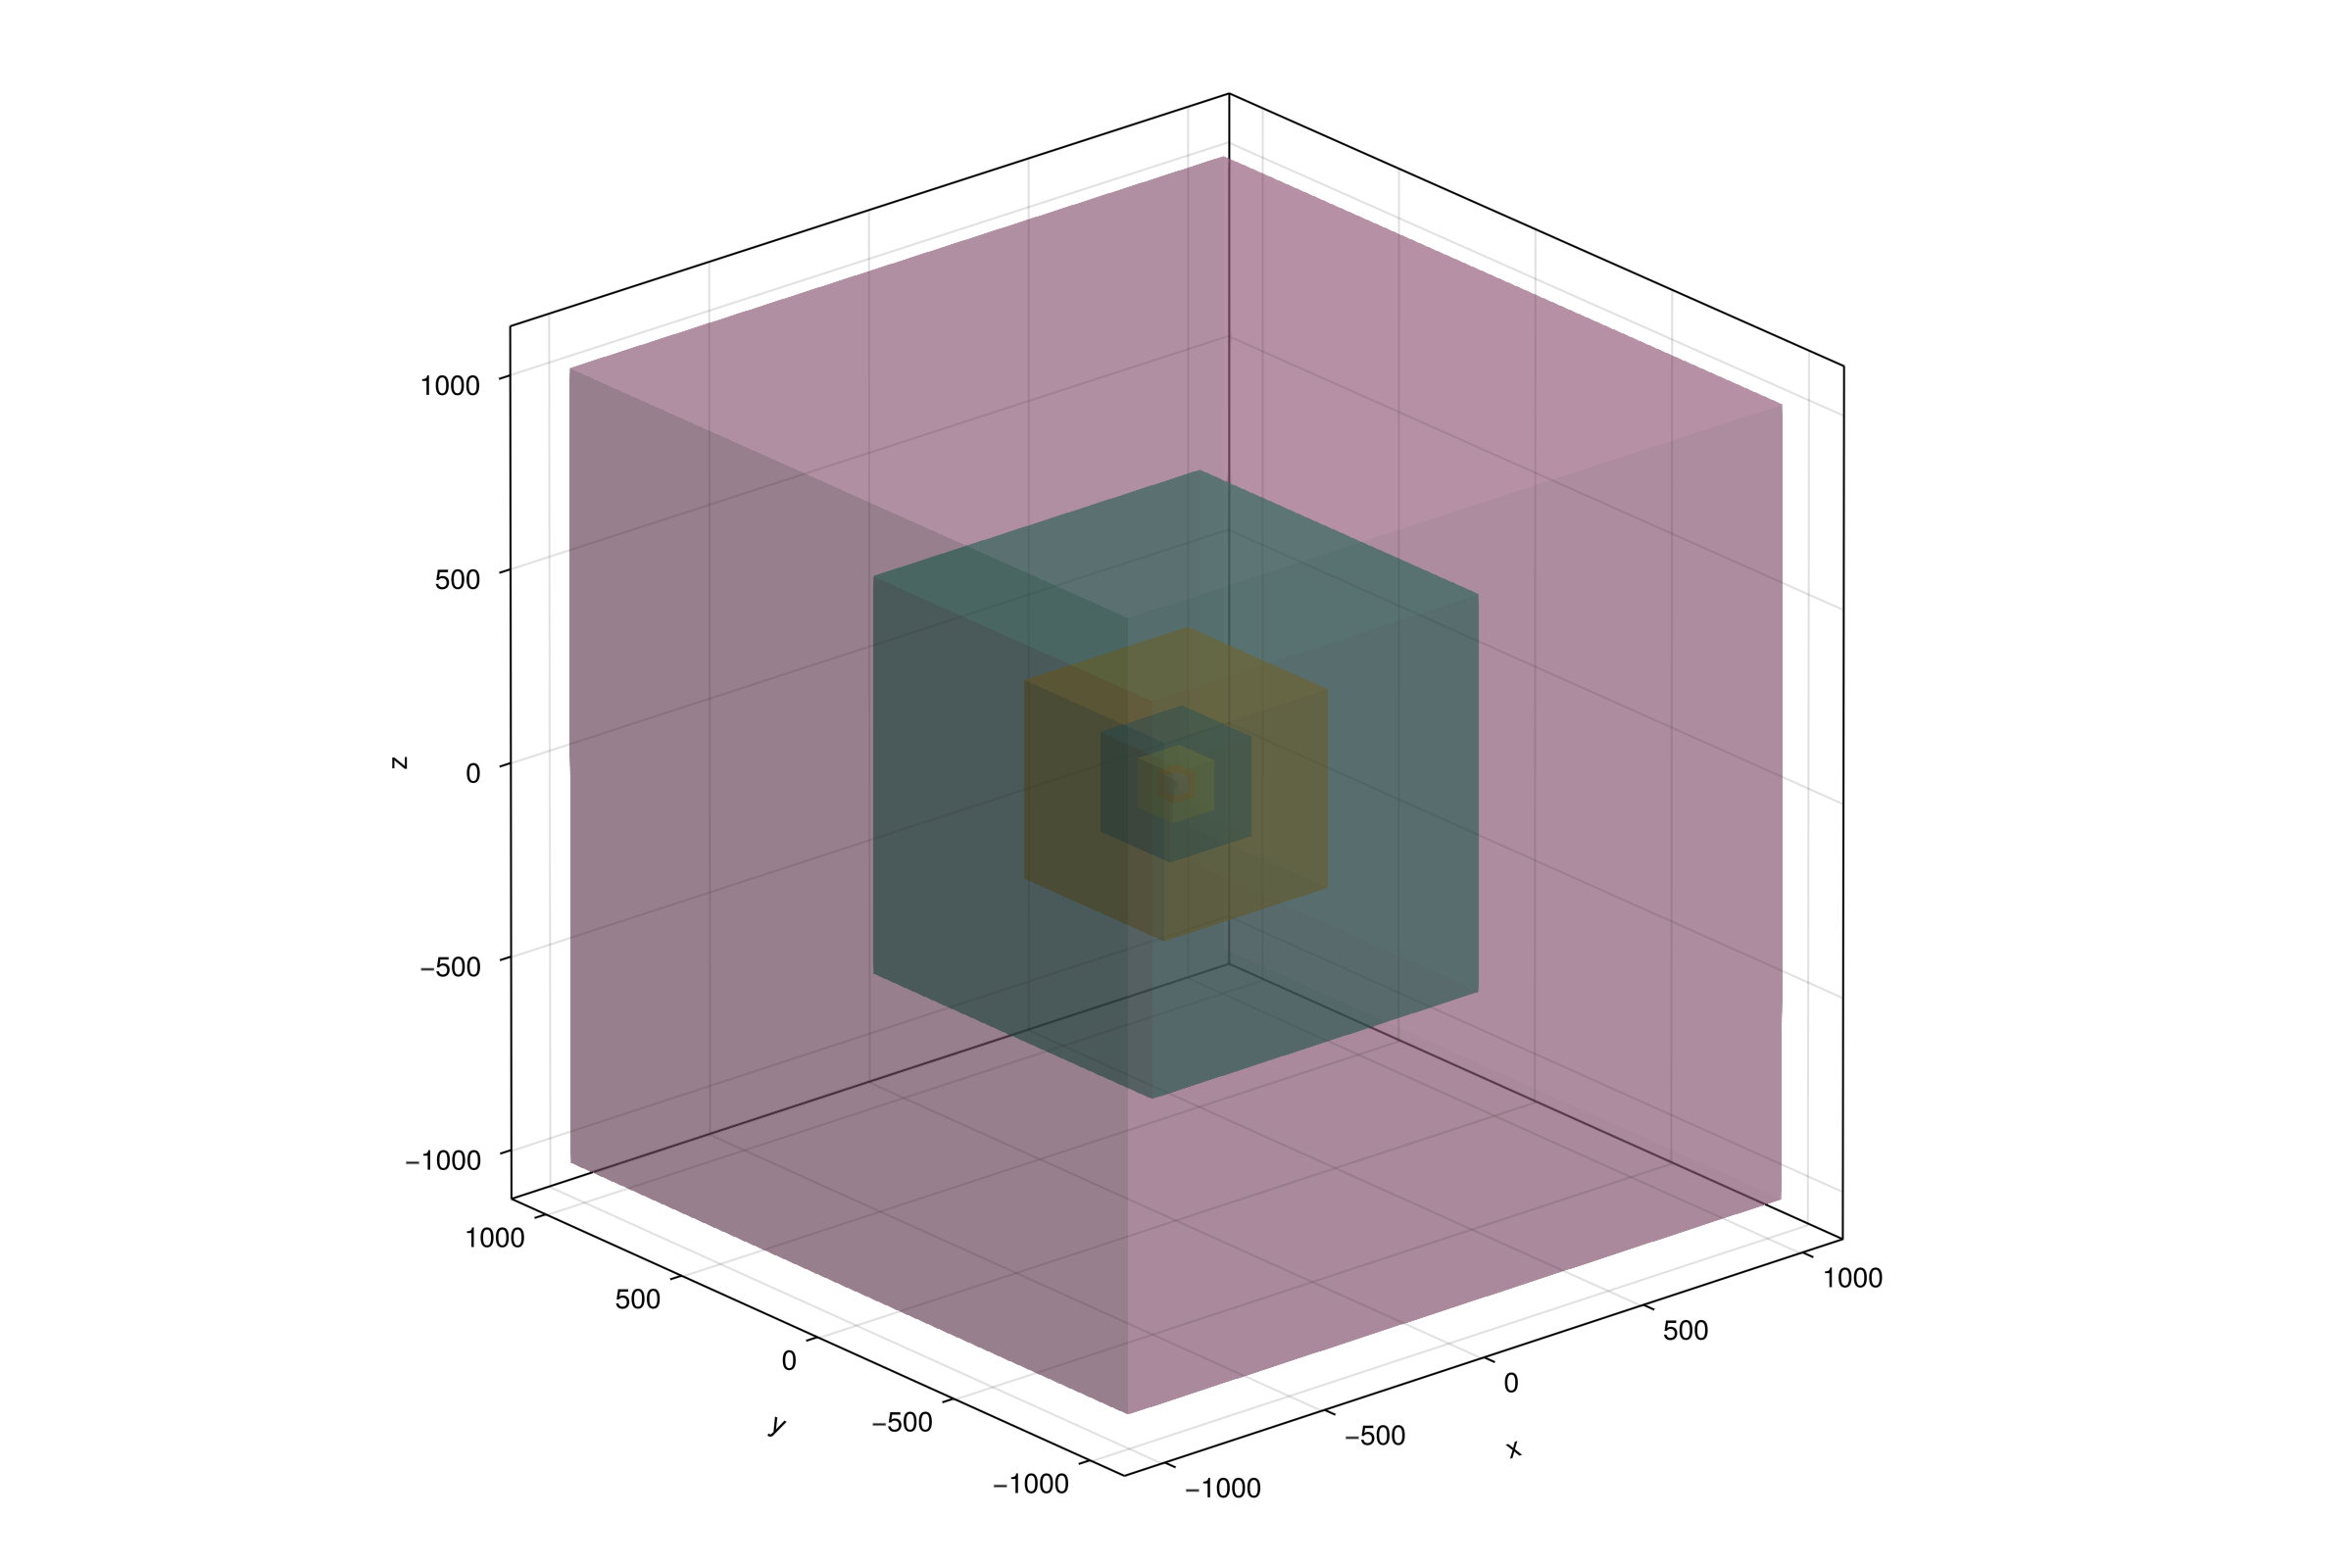

In [17]:
let recs = [
        recs_1[11], recs_1[12],
        recs_2[11], recs_2[12],
        recs_3[10], recs_3[9], recs_3[8], recs_3[7], recs_3[6], recs_3[5], recs_3[4],
    ]
    # Plot
    fig = Figure(size = (1200,800))
    ax = Axis3(fig[1, 1], aspect = :data, azimuth=1.275pi, elevation=pi/8)
    for rec in recs
        mesh!(fig[1, 1], rec, transparency = true, alpha = 0.5)
    end
    fig
end